In [2]:
#standard data imports
import pandas as pd
import numpy as np

#pulling sample dataset
from pydataset import data

#new library!! for stats!!! 
from scipy import stats



# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?



$H_o$: Switching internet service providers does not affect the network latency

$H_a$: Switching internet service providers has made the latency go up

True Positive: Switching internet service providers does make the latency go up, and we were correct

# 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

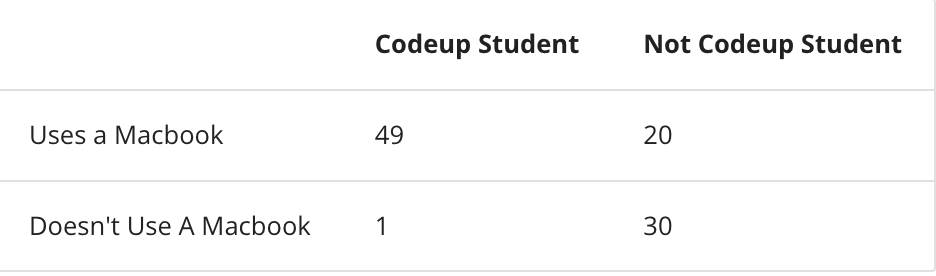


In [3]:
data_dict = {'Codeup Student': [49, 1], 'Not a Codeup Student': [20, 30]}
data_dict

{'Codeup Student': [49, 1], 'Not a Codeup Student': [20, 30]}

In [4]:
observed = pd.DataFrame(data_dict, index = ['Uses a Macbook', 'Doesn\'t Use a Macbook'])
observed

,Codeup Student,Not a Codeup Student
Uses a Macbook,49,20
Doesn't Use a Macbook,1,30


### set my hypothesis and alpha

$H_o$ : There is no relationship between being a codeup student and using a macbook

$H_a$ : There is a relationship between being a codeup student and usingn a macbook

In [5]:
alpha = 0.05

### calculate

In [6]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [7]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [8]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [9]:
observed.values

array([[49, 20],
       [ 1, 30]])

In [10]:
chi2, dof

(36.65264142122487, 1)

In [11]:
p

1.4116760526193828e-09

### conclude

my p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude there is a relationship between being a codeup studend and using a macbook.

# 2. Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a chi2 test of independence.
- State your conclusion

In [12]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [13]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

### setup

Q: Does the class of the car affect how many cylinders it has?

$H_o$ : Car class is independent of number of cylinders.

$H_a$ : Car class is dependent of number of cylinders.



In [14]:
alpha = 0.05

In [15]:
mpg.cyl.value_counts()

cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

In [16]:
mpg['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [17]:
observed = pd.crosstab(mpg.cyl, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [18]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [19]:
p

1.5351076620141522e-20

### Conclude

my p-value is less than alpha, therefore, we reject the null hypothesis.

we can conclude that car class is dependent on number of cylinders.


### Use the data from the employees database to answer these questions:

In [20]:
import env

In [21]:
def get_db_url(user, password, host, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [22]:
url = get_db_url(env.user, env.password, env.host, 'employees')

In [23]:
pd.read_sql('show tables', url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [24]:
query = '''
select *
from employees as e
	join dept_emp as de
		using (emp_no)
	join departments as d
		using (dept_no)
where to_date > now()
	and dept_name in ('sales','marketing')
'''

In [25]:
df = pd.read_sql(query, url)

In [26]:
df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


### setup

$H_o$: There is no relationship between gender and whether or not an employees works in sales or marketing

$H_a$: There is relationship between gender and whether or not an employees works in sales or marketing

In [27]:
df.gender.value_counts()

gender
M    31680
F    20863
Name: count, dtype: int64

In [28]:
df.dept_name.value_counts()

dept_name
Sales        37701
Marketing    14842
Name: count, dtype: int64

In [29]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [30]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [31]:
chi2, dof

(0.3240332004060638, 1)

In [32]:
p

0.5691938610810126

### conclude
My p-value is greater than alpha, therefore, fail to reject the null hypothesis.

We can conclude there is no relationship between gender and department (sales or marketing only)

### Is an employee's gender independent of whether or not they are or have been a manager?

In [33]:
query = '''select *
from dept_manager
	right join employees
		using (emp_no)''' 

In [34]:
df = pd.read_sql(query, url)

In [35]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [36]:
df.gender.value_counts()

gender
M    179973
F    120051
Name: count, dtype: int64

In [37]:
df.to_date.value_counts(dropna=False)

to_date
None          300000
9999-01-01         9
1989-05-06         1
1992-09-08         1
1988-10-17         1
1991-04-08         1
1991-03-07         1
1994-06-28         1
1991-09-12         1
1992-04-25         1
1991-10-01         1
1996-08-30         1
1992-08-02         1
1988-09-09         1
1992-03-21         1
1989-12-17         1
1996-01-03         1
Name: count, dtype: int64

In [38]:
df['is_manager'] = df.to_date.notnull()

In [39]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None,False


In [40]:
df.is_manager.value_counts()

is_manager
False    300000
True         24
Name: count, dtype: int64

### setup

$H_o$: there is no relationship between gender and being a manager

$H_a$: there is a relationship between gender and being a manager



In [41]:
observed = pd.crosstab(df.is_manager, df.gender)
observed

gender,F,M
is_manager,,
False,120038,179962
True,13,11


In [42]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [43]:
expected

array([[1.20041397e+05, 1.79958603e+05],
       [9.60331174e+00, 1.43966883e+01]])

In [44]:
chi2, dof

(1.4566857643547197, 1)

In [45]:
p

0.22745818732810363

### conclude

My p-value is greater than alpha, fail to reject the null hypothesis.

We can conclude this is no relationship between gender and being a manager.

# 1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?
- Does smoking affect when or not someone has lung cancer?
- Is gender independent of a person’s blood type?
- Does whether or not a person has a cat or dog affect whether they live in an apartment?
- Does the length of time of the lecture correlate with a student's grade?

### * Is there a relationship between the length of your arm and the length of your foot?

* Correlation 

### * Does smoking affect when or not someone has lung cancer?

* Chi2

### * Is gender independent of a person’s blood type?

* Chi2

### * Does whether or not a person has a cat or dog affect whether they live in an apartment?

* Chi2

### * Does the length of time of the lecture correlate with a student's grade?

* Correlation

### 2. Use the telco_churn data.

- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

### * Does tenure correlate with monthly charges?

In [47]:
url = get_db_url(env.user, env.password, env.host, 'telco_churn')

In [48]:
pd.read_sql('show tables', url)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


In [49]:
query = "SELECT * FROM customers;"

In [50]:
df = pd.read_sql(query, url)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [52]:
df.tenure.head()

0     9
1     9
2     4
3    13
4     3
Name: tenure, dtype: int64

In [53]:
df.monthly_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: monthly_charges, dtype: float64

### Form hypothesis and set confidence level

$H_o$: There is NO linear relationship between tenure and monthly charges

$H_a$: There IS a linear relationship between tenure and monthly charges

In [54]:
alpha = 0.05

In [55]:
stats.pearsonr(df.tenure, df.monthly_charges)

PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [56]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)

In [57]:
r

0.24789985628615246

In [58]:
p

4.094044991476844e-99

In [59]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [60]:
The p-value is less than alpha, therefore, we reject the null hypothesis

We can conclude there is a linear relationship between 

SyntaxError: invalid syntax (1018692163.py, line 1)

In [ ]:
plt.scatter(df.tenure, df.monthly_charges)
plt.title('how does tenure relate to monthly charges?')
plt.xlabel('tenure') #first value sent into scatter
plt.ylabel('monthly charges') #second value sent into scatter
plt.show();

### * Total charges?

In [ ]:
# option to remove them from the dataset
df = df [df.total_charges !=' ']

In [ ]:
df.total_charges

In [ ]:
df.total_charges = df.total_charges.astype(float)

In [ ]:
sns.scatterplot(data=df, x='tenure', y='total_charges');

In [ ]:
r, p = stats.pearsonr(df.tenure, df.total_charges)

In [ ]:
r

In [ ]:
p

In [ ]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

The p-value is less alpha, therefore, we reject the null hypothesis

We can conclude that there is strong linear relationship between total charges and tenure

### * What happens if you control for phone and internet service?

In [ ]:
df = pd.read_sql(query, url)

In [ ]:
df.phone_service.value_counts

In [ ]:
df.internet_service_type.value_counts()

In [ ]:
sns.relplot(data=df, y='monthly_charges', x='tenure', 
                col='phone_service', hue='internet_service_type');

In [61]:
def run_pearsonr(df):
    r,p = stats.pearsonr(df.monthly_charges, df.tenure)
    return pd.Series((r,p))

In [62]:
df.groupby(['phone_service','internet_service_type']).apply(run_pearsonr)

KeyError: 'internet_service_type'

For all of these groupings, the p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude there is a linear relationship for monthly charges and tenure when we control for phone service and internet service type.

### 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?


### * Is there a relationship between how long an employee has been with the company and their salary?

In [65]:
url = get_db_url(env.user, env.password, env.host, 'employees')

In [66]:
query = '''
select *
from employees
	join salaries
		using (emp_no)
where to_date > now()
'''

In [67]:
df = pd.read_sql(query, url)

In [68]:
df.shape

(240124, 9)

In [69]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


In [71]:
df['tenure_days'] = df.to_date - df.hire_date

In [72]:
df.to_date - df.hire_date

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [73]:
df.tenure_days = df.tenure_days.astype('str').str.split(expand=True)[0]

In [74]:
df.tenure_days

0         2926512
1         2926729
2         2926449
3         2926354
4         2925338
           ...   
240119    2924120
240120    2924958
240121    2926578
240122    2923846
240123    2922337
Name: tenure_days, Length: 240124, dtype: object

In [75]:
df.tenure_days = df.tenure_days.astype(int)

In [76]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,2926512
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,2926729
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,2926449
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,2926354
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,2925338


$H_o$: There is no linear relationship between tenure and salary

$H_a$: There is a linear relationship between tenure and salary

alpha = 0.05

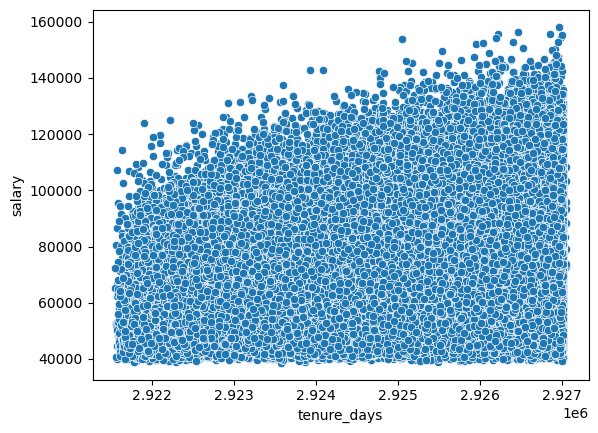

In [77]:
sns.scatterplot(data=df, x='tenure_days', y='salary');

In [78]:
r, p = stats.pearsonr(df.tenure_days, df.salary)

In [79]:
r

0.30646256131860095

In [80]:
p

0.0

The p-value is than alpha, so we reject the null hypothesis.

We can conclude there is a weak linear relationship between an employees salary and their tenure.

### * Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [81]:
query = '''
select emp_no, count(title) as title_cnt
, datediff(max(to_date), hire_date) as tenure_days
from employees
	join titles
		using (emp_no)
group by emp_no
having max(to_date) > now()
'''

In [82]:
df = pd.read_sql(query, url)

In [83]:
df.title_cnt.value_counts()

title_cnt
2    125345
1    111892
3      2887
Name: count, dtype: int64

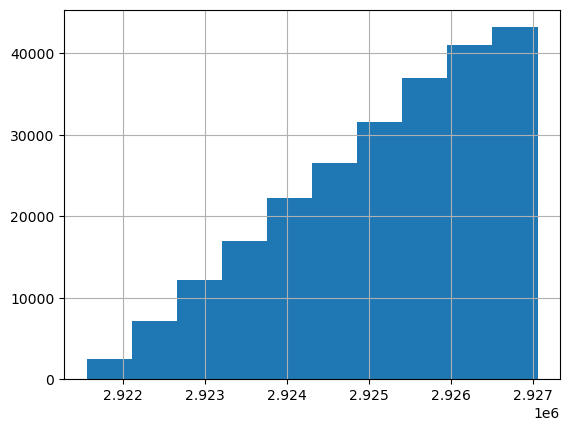

In [84]:
df.tenure_days.hist();

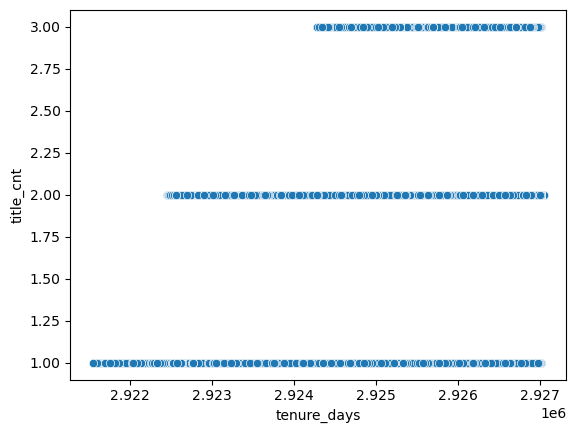

In [85]:
sns.scatterplot(data=df, x='tenure_days', y='title_cnt');

$H_o$: there is no linear relationship between number of titles and how long an employees has been there

$H_a$: there is linear relationship between number of titles and how long an employees has been there

alpha = 0.05

In [87]:
stats.pearsonr(df.tenure_days, df.title_cnt)

PearsonRResult(statistic=0.2871267889704716, pvalue=0.0)

The p-value is less than alpha, so we reject the null hypothesis.

There is a relationship between tenure and number of titles.

### Use the sleepstudy data.

In [88]:
df = data('sleepstudy')

In [89]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


### Is there a relationship between days and reaction time?

In [90]:
df.Days.value_counts()

Days
0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: count, dtype: int64

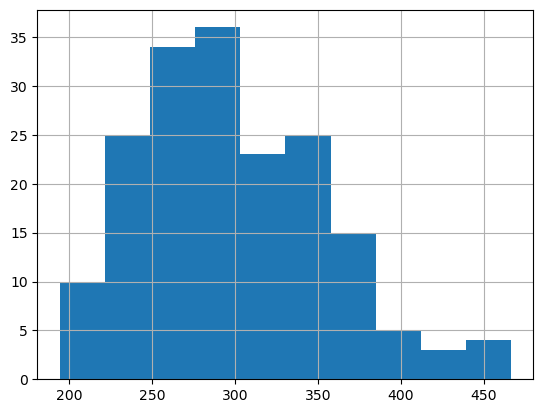

In [91]:
df.Reaction.hist();

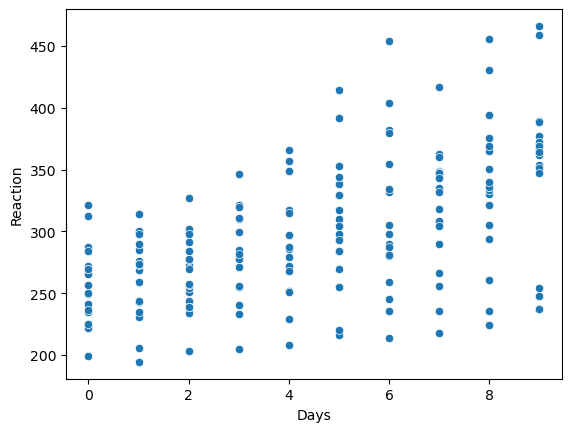

In [92]:
sns.scatterplot(data=df, x='Days', y='Reaction');

In [93]:
stats.pearsonr(df.Days, df.Reaction)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.894096322214486e-15)

The p-value is less than alpha, so we reject the null hypothesis.

There is a correlation between days and reaction time in the sleep study.

### 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who don't drink milk?
- Is the price of gas higher in Texas or in New Mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

### Is there a difference in grades of students on the second floor compared to grades of all students?

 1 sample 2 tail

### * Are adults who drink milk taller than adults who don't drink milk?

2 sample 1 tail

### * Is the price of gas higher in Texas or in New Mexico?

2 sample 1 tail 

### * Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Anova

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [94]:
# Looking at these two samples:
# 40 sales from office #1:
# distributed with a mean of 90 days and a std of 15 days
# 50 sales from office #2:
# distributed with a mean 100 days and a standard deviation of 20 days

In [95]:
# stats.ttest_ind_from_stats?

In [96]:
# simulations of the offices in two different ways:
# way 1: use numpy's normal random sample
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))
# alternatively, another simulation method:
# using stats to simulate a normal dist and then take Random ValueS
office_1 = stats.norm(90,15)
office_2 = stats.norm(100,20)

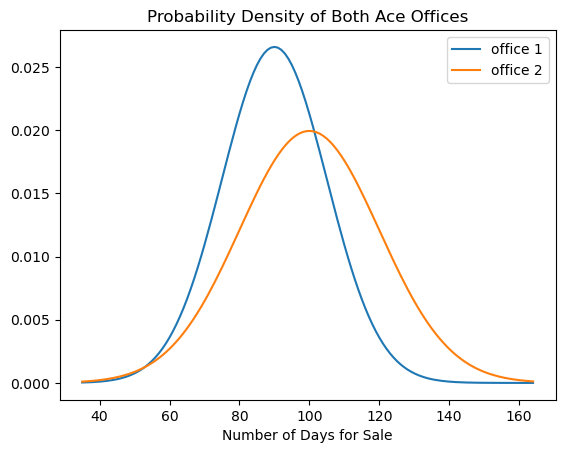

In [97]:
# a little bit of extra exploration:
x = np.arange(35, 165)
y1 = [office_1.pdf(n) for n in x]
y2 = [office_2.pdf(n) for n in x]
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label='office 2')
plt.legend()
plt.title('Probability Density of Both Ace Offices')
plt.xlabel('Number of Days for Sale')
plt.show()

In [ ]:
# option 1:
# use the simulations that I just created
# option 2: use ttest_ind_from_stats

In [98]:
# option 1:
# lets take the two simulated versions
# Parameters:
# We know they are normal specifically because we defined them as so
# Do we know that they have equal variance?
# Well we know the stds are different,
# but lets see what a levene test says

In [99]:
# Levene Set-Up
# H0: The variance in office 1 sales is equivalent to office 2 sales
# H1: the variance in office 1 sales is different from office 2
# confidence level: standard, 95% ==? 0.95
#  ==> alpha: 0.05
lv_stat, p = stats.levene(office_1.rvs(40), office_2.rvs(50))
if p < 0.05:
    print('I can reject H0')
else:
    print('We fail to reject h0')

I can reject H0


In [ ]:
# we fail to reject the null hypothesis, which means that
# we cannot assert that these have different variances
# which means that students ttest will do.

$H_o$ : There is no difference in the average sale time between office 1 and office 2

$H_a$ : There is a difference in the average sale time for office 1 to office 2

In [103]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

In [104]:
# alpha: 0.05
α = 0.05
t_stat, p = stats.ttest_ind(
    office_1.rvs(40),
    office_2.rvs(50),
    equal_var=True)

In [105]:
t_stat

-1.5613170607203972

In [106]:
p

0.1220382066303678

In [107]:
test_hypothesis(p, t_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.1220382066303678.
 Our statistic is -1.5613170607203972


In [108]:
# solve this the other way:
t_stat, p = stats.ttest_ind_from_stats(
    90,
    15,
    40,
    100,
    20,
    50
)

In [109]:
t_stat

-2.6252287036468456

In [110]:
p

0.01020985244923939

In [111]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.01020985244923939 
 Our statistic value is -2.6252287036468456


In [112]:
from pydataset import data

### 3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
# lets create a new column for fuel efficiency based on
# the average between city and highway mileage

In [ ]:
# lets create a new column for fuel efficiency based on
# the average between city and highway mileage

In [113]:
# reassign mpg into a version of itself
# but this time with a new column called fuel_e
# that holds the harmonic mean between city and highway mileage
# huzzah!
mpg = mpg.assign(fuel_e = stats.hmean((mpg.cty, mpg.hwy)))

In [114]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  fuel_e        234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [115]:
# same flow chart from before:
# what variables am I examining?
# fuel efficiency! I just created it! Its continuous! Its one thing!
# Fuel efficiency across two categories, though!
# years of vehicles in 99 vs vehicles from '08

In [116]:
mpg.year.unique()


array([1999, 2008])

In [118]:
# If I want to proceed forward with testing here:
# mpg dataframe, where the mpg dataframe year is 1999 ==> specifically the fuel_e Series
# mpg dataframe where mpg dataframe year is 2008 ==> specifically the fuel_e Series

In [119]:
fuel_2008 = mpg[mpg.year == 2008].fuel_e
fuel_1999 = mpg[mpg.year == 1999].fuel_e

In [ ]:
# to continue with means testing:
# normality
# variance
# independence

In [120]:
# normality? 
fuel_2008.shape

(117,)

In [121]:
fuel_1999.shape

(117,)

In [122]:
# so I have 117 samples for each, I'll toss that in with CLT assumtions
# but put a pin in it to revisit

In [123]:
# variance:
# lets run a levene test:
# H0: the variance is equivalent for 99 vehicles compared to 2008 vehicles
# Ha: the variance is different for 99 vehicles compared to 08 vehicles
lev_stat, p = stats.levene(fuel_1999, fuel_2008)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8602339200830025.
 Our statistic is 0.031071867429515194


In [135]:
# independence? We know that there are no samples in this dataframe
# that are 2008 and 1999.  These are exclusive.
# 
# two tailed ==> we want to know if there is a difference in general
# two sampled ==> 1999 vs 2008, not one of those against all cars
# proceeding forward with our means test:
t_stat, p = stats.ttest_ind(fuel_1999,
                            fuel_2008,
                            equal_var=True)
test_hypothesis(p, t_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.7635345888327115.
 Our statistic is 0.3011962975077886


### Are compact cars more fuel-efficient than the average car?

In [125]:
# one sample or two sample?
# one sample: compact cars vs all cars
# one tail or two tailed?
# one tailed: *more* fuel efficient

In [126]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [127]:
# so lets proceed forward with a one-tailed one sample test!
# just the compact cars from mpg, specifically the fuel efficiency:
fuel_compact = mpg[mpg['class'] == 'compact'].fuel_e

In [128]:
# stats.ttest_1samp?

In [129]:
# calculate the population mean for fuel efficiency
μ = mpg.fuel_e.mean()

In [130]:
t_stat, p = stats.ttest_1samp(fuel_compact,
                              μ)

In [131]:
t_stat

7.512360093161361

In [132]:
p

1.5617666348807277e-09

$H_o$: The fuel efficiency of compact cars is the same or less than the fuel efficiency of cars overall

$H_a$: The fuel efficiency of compact cars is greater than the fuel efficiency of cars overall

In [134]:
test_hypothesis?

Signature: test_hypothesis(p, stat, tails='two', direction='greater', α=0.05)
Docstring:
test_hypothesis will take in a p value and a test statistic
if p is less than a presumed alpha, then we  will reject
our null hypothesis

this takes in two positional arguments,
p stat, a float value representing the probability of serendipity
stat, a float value representing the test statistic

with the keyword arguments f tails, direction, and alpha,
the operator is able to change the control structrure in order
to perform a one-tailed ttest if so desired
File:      /var/folders/30/4qhjzk6n3zl1z989qrk83yym0000gn/T/ipykernel_2376/2634129996.py
Type:      function

In [136]:
# I want to test that 
# the fuel efficiency of compact cars is greater,
# so my t_stat should be positive if I reject my H0
# and I want to check p/2 against alpha instead of just p.
# this is handled
# based on the way we defined test_hypothesis
# and the fact that we fed in our arguments
# as the sample we compared against
# the population, 
# which the alternative hypothesis was looking for a difference
# in the greater-than direction.
# the positive tail of the t-distribution)
test_hypothesis(p,
                t_stat,
                tails='one')

We fail to reject the null hypothesis :(.
 Our p-value is 0.7635345888327115.
 Our statistic is 0.3011962975077886


### Do manual cars get better gas mileage than automatic cars?

In [137]:
# pandas refresher:
# mpg dataframe
# mpg
# just the transmission series:
# mpg.trans
# the values inside of the trans column but lowercase:
# needs a .str to do a string method on the values in that series
# mpg.trans.str.lower() ==> note parens on lower because method
# the output of that method is still a series full of strings
mpg.trans.str.lower().head(5)

1      auto(l5)
2    manual(m5)
3    manual(m6)
4      auto(av)
5      auto(l5)
Name: trans, dtype: object

In [138]:
# my god, its full of strings
# take those lower case strings
# and just check to see if the first letter is 'a':
# this will return a boolean because its a logic check:
mpg.trans.str.lower().str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [139]:
# if I tossed values in there with a np.where, etc
# then I would be needing to do a mask that looked a little more
# like
# mpg[mpg.is_auto == 'auto']
# buuuuut:

In [140]:
# if I assign it as a bool directly:
mpg['is_auto'] = mpg.trans.str.lower().str.startswith('a')
# then I can use that info directly as a mask since it already renders
# as a boolean

In [141]:
manual_fe = mpg[~mpg.is_auto].fuel_e
auto_fe = mpg[mpg.is_auto].fuel_e

Set up our hypothesis test:

$H_o$ : Manual vehicles get the same mileage as automatic vehicles or manual vehicles in fact get lower average mileage than automatic vehicles

$H_a$ : Manual vehicles get a better average mileage than automatic vehicles

In [142]:
# parameters:
# enough samples ==> presume normality (shapiro if we are picky)\
# (if shapiro fails, do a mann-whitneyu test)
# assert equal variance:
# lets do a quick levene

In [143]:
# H0: auto and manual mpg have equal variance
# Ha: ato and manual mpg have inequal variance
lev_stat, p = stats.levene(manual_fe, auto_fe)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.9062462281015493.
 Our statistic is 0.013901207169738269


In [144]:
# lets do our means test
# one tailed!
# we want to check that manual cars may get better fuel efficience
# we want to check that manual vehicle mpg > auto vehicle mpg
# so we will feed them that order, and expect t_stat > 0 in order
# to reject the null hypothesis
# if man.mpg > auto.mpg ==> positive t_stat ==> reject null if p(/2) is also OK
t_stat, p = stats.ttest_ind(
    manual_fe,
    auto_fe,
    equal_var=True)
test_hypothesis(p,
                t_stat,
                tails='one',
               α=0.05)
            

We can reject our null hypothesis!.
 Our p-value is 5.510464610044009e-06 
 Our statistic value is 4.652577547151351
